In [4]:
import pandas as pd

In [17]:
columns = ['user_id','datetime','product','amount']
df=pd.read_table('CDNOW.txt',names = columns,sep = '\s+')

In [18]:
df.describe()

,user_id,datetime,product,amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [61]:
df['date'] = pd.to_datetime(df.datetime, format = '%Y%m%d')
df['month']= df['date'].dt.month

In [62]:
df.head()

,user_id,datetime,product,amount,date,month
0,1,19970101,1,11.77,1997-01-01,1
1,2,19970112,1,12.00,1997-01-12,1
2,2,19970112,5,77.00,1997-01-12,1
3,3,19970102,2,20.76,1997-01-02,1
4,3,19970330,2,20.76,1997-03-30,3


In [50]:
user_group = df.groupby('user_id').sum()

In [25]:
user_group.head()

,datetime,product,amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [26]:
user_group.describe()

,datetime,product,amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


In [27]:
import matplotlib.pyplot as plt

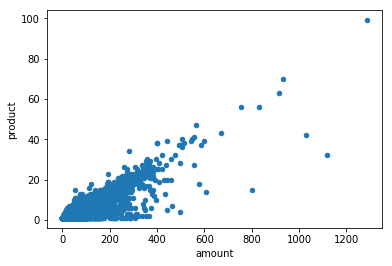

In [29]:
df.plot.scatter(x = 'amount', y = 'product')

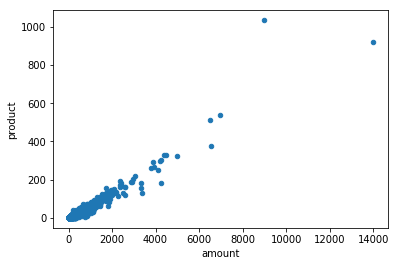

In [30]:
df.groupby('user_id').sum().plot.scatter(x = 'amount', y = 'product')

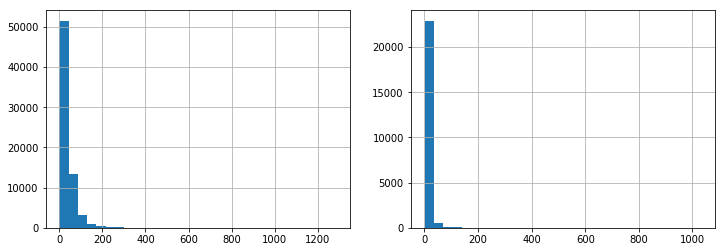

In [32]:
plt.figure(figsize = (12,4))
plt.subplot(121)
df.amount.hist(bins = 30)
plt.subplot(122)
df.groupby('user_id').product.sum().hist(bins = 30)

In [55]:
df.groupby('user_id').month.min().value_counts()

1    8855
2    8263
3    6452
Name: month, dtype: int64

In [56]:
df.groupby('user_id').month.max().value_counts()

2     5064
3     4900
1     4244
12    1864
11    1396
6     1084
4      987
10     961
5      870
7      813
9      718
8      669
Name: month, dtype: int64

In [64]:
pivoted_counts = df.pivot_table(index = 'user_id', columns = 'month',
                               values = 'datetime', aggfunc = 'count').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0


In [66]:
import numpy as np

In [67]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0


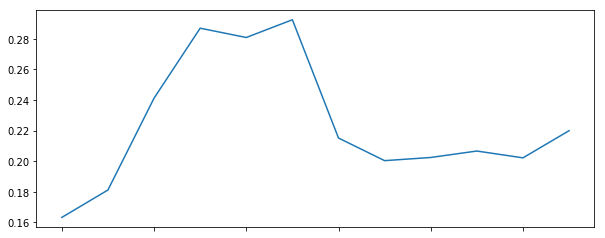

In [68]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))

In [69]:
pivoted_amount = df.pivot_table(index = 'user_id', columns = 'month',
                               values = 'amount', aggfunc = 'mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,11.770000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000
2,44.500000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000
3,20.760000,0.0,20.76,19.54,16.99,0.00,0.00,0.00,0.00,0.0,39.205,0.000
4,29.530000,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480
5,26.923333,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465


In [70]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x> 0 else 0)
pivoted_purchase.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1
5,1,1,0,1,1,1,1,0,1,0,0,1


In [71]:
user_purchase = df[['user_id','product','amount','date']]
order_date_min = user_purchase.groupby('user_id').date.min()
order_date_max = user_purchase.groupby('user_id').date.max()
(order_date_max-order_date_min).head(10)

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: date, dtype: timedelta64[ns]

In [72]:
(order_date_max-order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

In [73]:
life_time = (order_date_max-order_date_min).reset_index()
life_time.head()

,user_id,date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


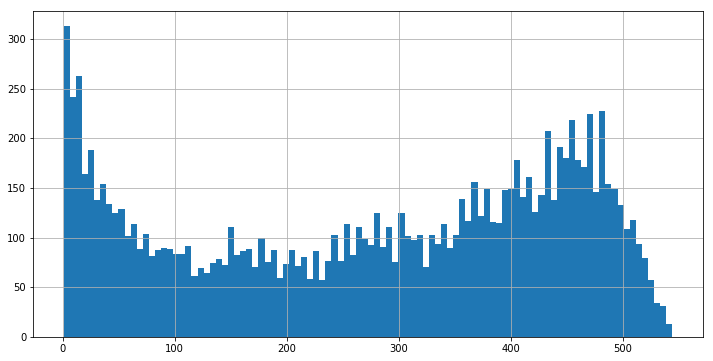

In [74]:
life_time['life_time'] = life_time.date/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins = 100, figsize = (12,6))

In [75]:
life_time[life_time.life_time>0].life_time.mean()

276.0448072247308

In [76]:
user_purchase_retention = pd.merge(left = user_purchase, right = order_date_min.reset_index(),
                                   how = 'inner', on = 'user_id',
                                   suffixes = ('', '_min')
                                  )
user_purchase_retention.head()

,user_id,product,amount,date,date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


In [79]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.date-user_purchase_retention.date_min
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D')) 
user_purchase_retention.head()


,user_id,product,amount,date,date_min,order_date_diff,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0


In [80]:
bin = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(10)

,user_id,product,amount,date,date_min,order_date_diff,date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60, 90]"
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0,"(60, 90]"
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0,"(180, 365]"
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0,"(180, 365]"
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0,NaN
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0,NaN


In [82]:
pivoted_retention = user_purchase_retention.pivot_table(index = 'user_id', columns = 'date_diff_bin',
                                                       values = 'amount', aggfunc = sum, dropna = False)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.9,NaN,110.4,155.54


In [83]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [84]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1
